In [15]:
import matlab.engine
import pickle
import numpy as np
import scipy
import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

In [11]:
# sns.set_style('white')
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 2}

# matplotlib.rc('font', **font)
# matplotlib.rcParams.update({'font.size': 2})

import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# eng.addpath(eng.genpath('/home/yzy/software/GMM-HMRF/code'))
eng.quit()




In [5]:
def numpy2mat(numpy_mat):
    list_mat = list(map(lambda x:list(x),numpy_mat))
    return matlab.double(list_mat)

In [3]:
with open('/home/yzy/bioSIMS/data/Segment_Cut/Cut_256.pickle', 'rb') as handle:
    Cut_mask_dict = pickle.load(handle)
with open('/home/yzy/bioSIMS/data/Segment_SIMS/SIMS_256_rotation.pickle', 'rb') as handle:
    SIMS_dict = pickle.load(handle)
with open('/home/yzy/bioSIMS/data/Segment_Human_256/Human_256_int.pickle', 'rb') as handle:
    Human_mask_dict = pickle.load(handle)

In [54]:
def ordinal_label(seg,img):
    unique_seg_id_list = np.unique(seg)
    avg_intensity_list = []
    for unique_seg_id in unique_seg_id_list:
        cur_intensity_list = img[np.where(seg==unique_seg_id)]
        avg_intensity_list.append(np.mean(cur_intensity_list))
    bg_idx = unique_seg_id_list[np.argmin(avg_intensity_list)]
    fg_idx = unique_seg_id_list[np.argmax(avg_intensity_list)]
    seg_return = np.zeros_like(seg)
    seg_return[seg==bg_idx]=0
    seg_return[seg==fg_idx]=1
    return seg_return

In [60]:
def HMRF(img, k):
    # img = SIMS_dict['A549'].copy()
    img_mat = numpy2mat(img)
    k = float(k)

    EM_iter = 10.0
    MAP_iter = 10.0
    eng = matlab.engine.start_matlab()

    eng.addpath(eng.genpath("/home/yzy/software/GMM-HMRF/code"))
    final_seg, initial_seg = eng.HMRF_run(img_mat, k, EM_iter, MAP_iter, nargout=2)

    # final_seg,initial_seg=eng.HMRF_run(nargout=2)

    final_seg = np.array(final_seg)
    initial_seg = np.array(initial_seg)

    final_seg = ordinal_label(final_seg, img)
    initial_seg = ordinal_label(initial_seg, img)

    eng.quit()
    return final_seg, initial_seg



In [66]:
test_tissue = 'R1'
k=5
img = SIMS_dict[test_tissue]
final_seg,initial_seg = HMRF(img,k)

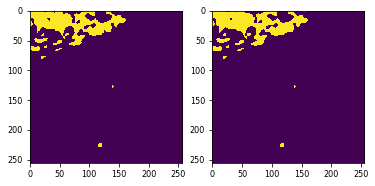

In [67]:
fig,axes = plt.subplots(1,2)
axes[0].imshow(initial_seg)
axes[1].imshow(final_seg)
plt.show()

In [69]:
HMRF_mask_dict = {}

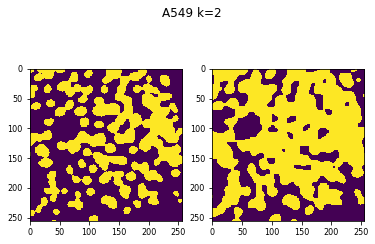

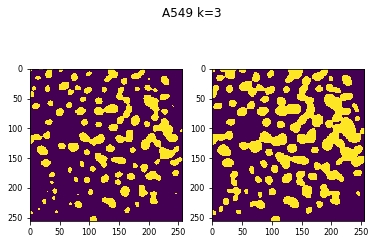

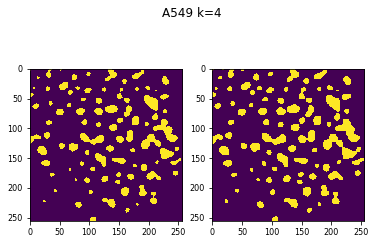

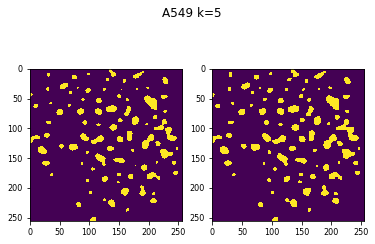

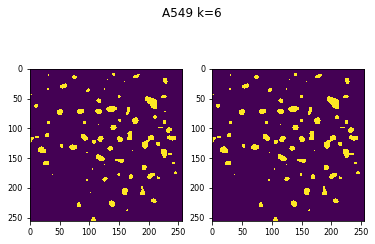

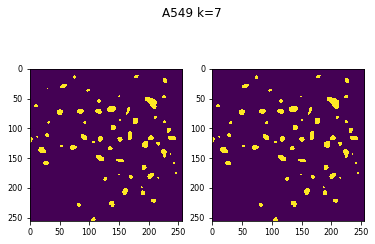

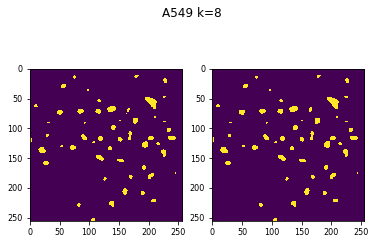

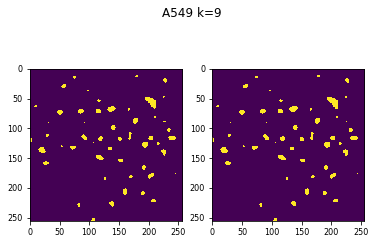

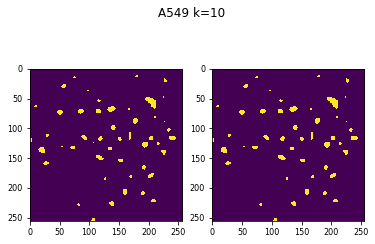

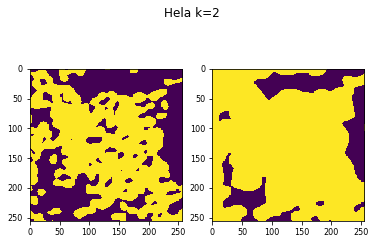

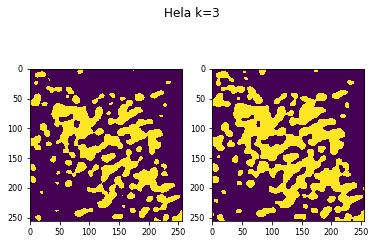

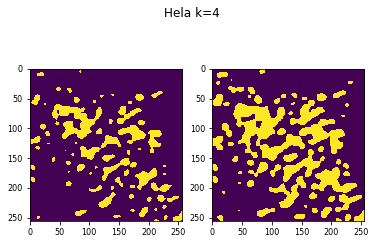

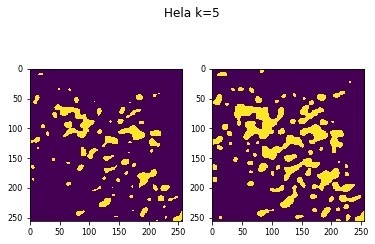

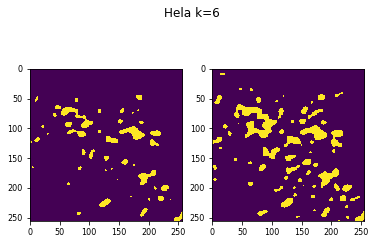

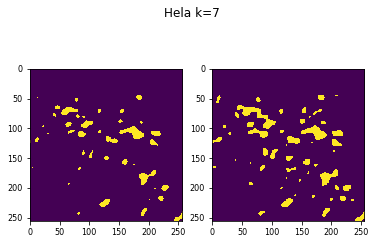

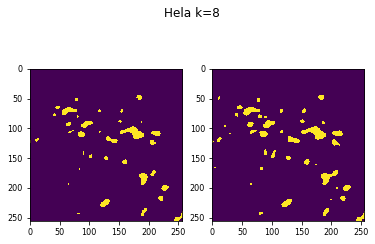

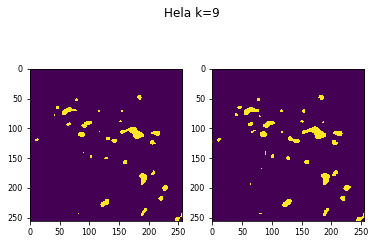

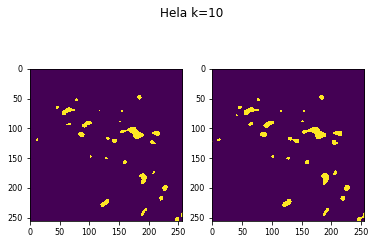

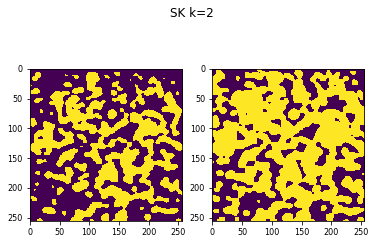

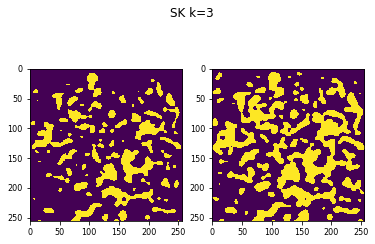

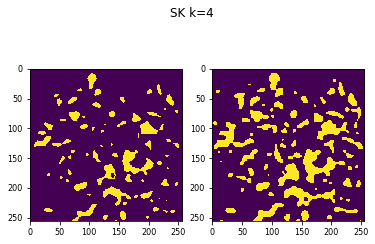

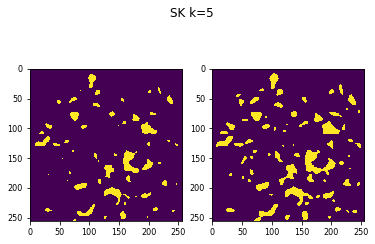

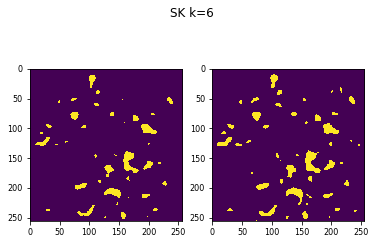

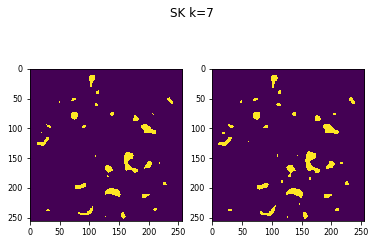

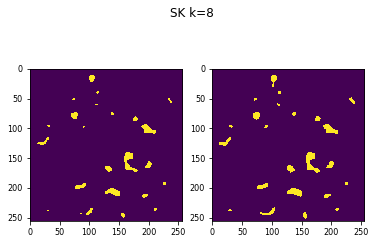

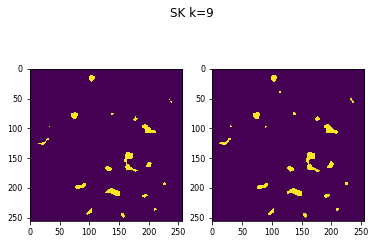

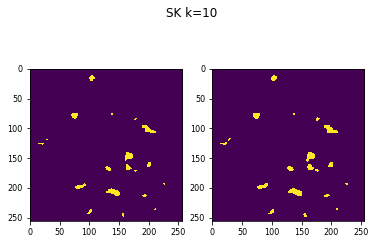

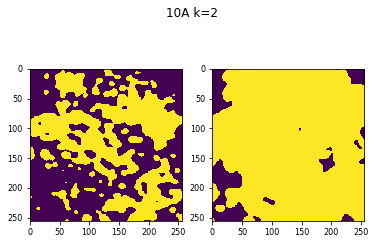

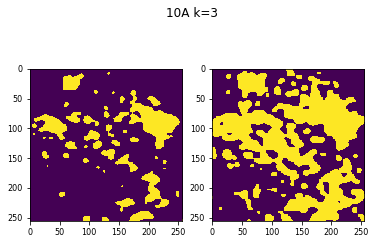

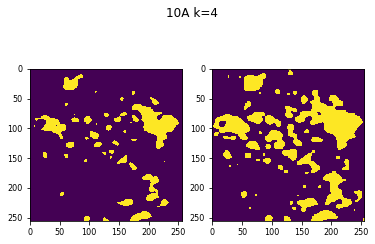

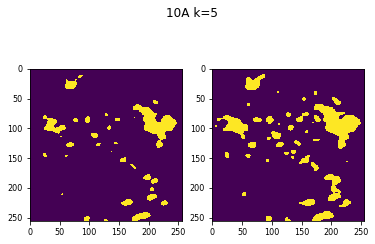

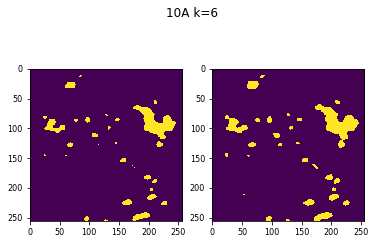

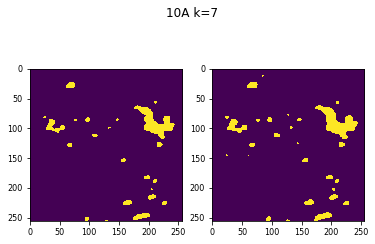

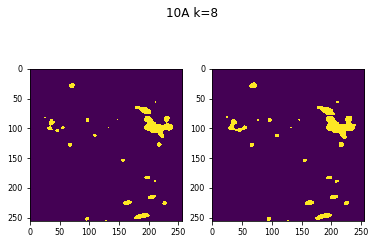

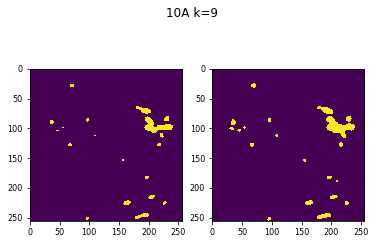

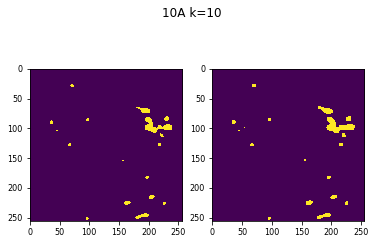

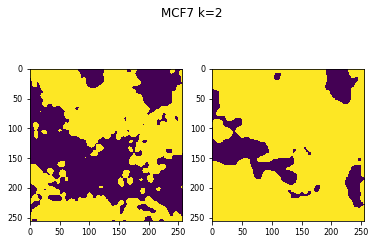

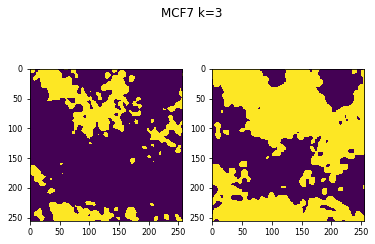

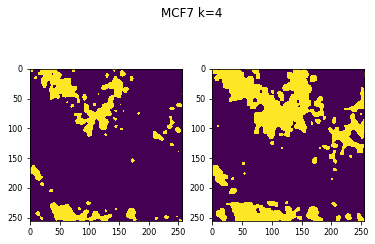

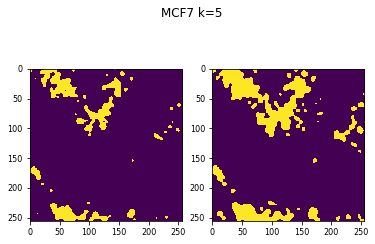

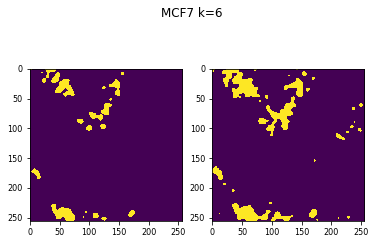

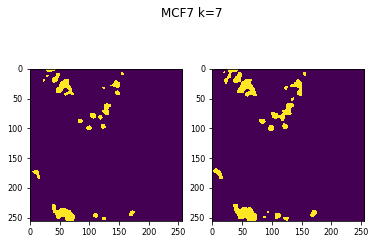

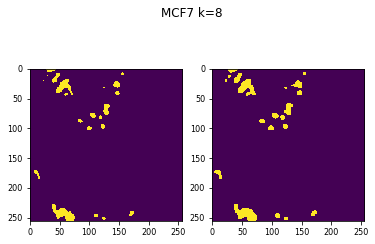

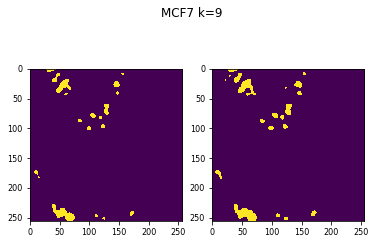

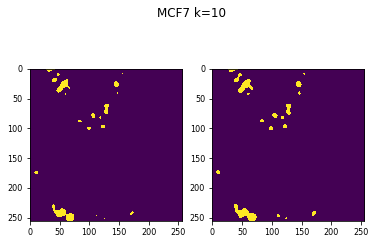

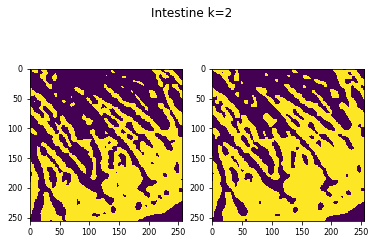

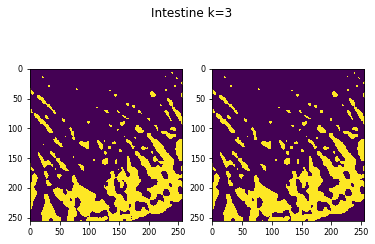

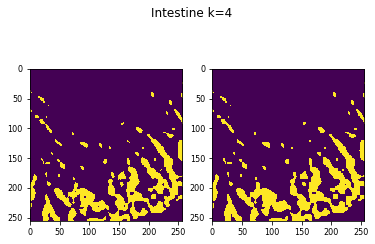

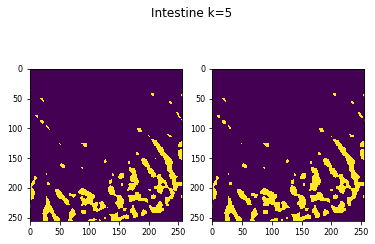

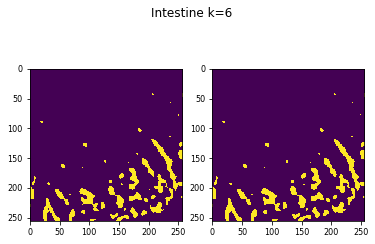

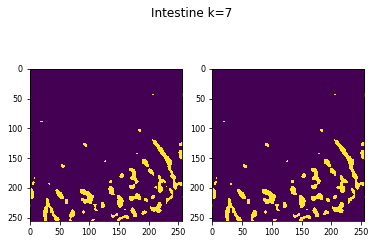

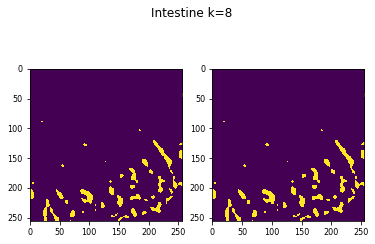

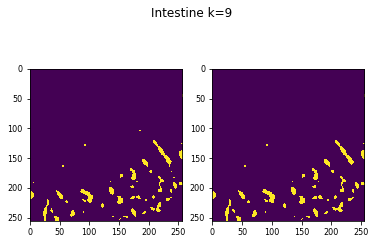

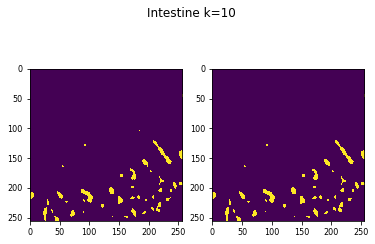

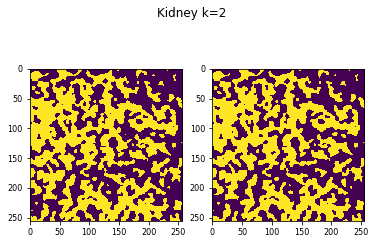

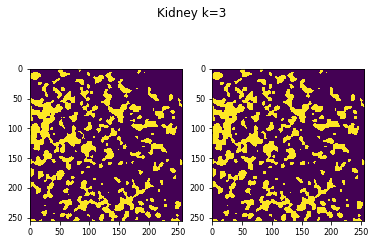

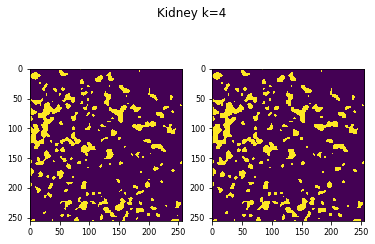

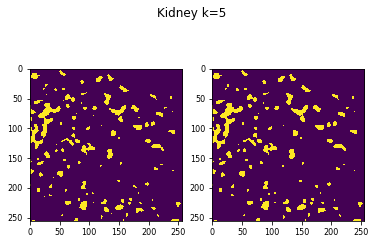

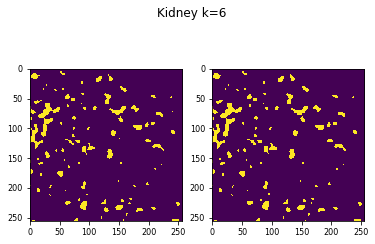

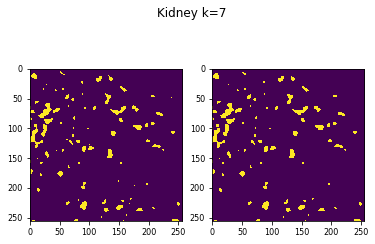

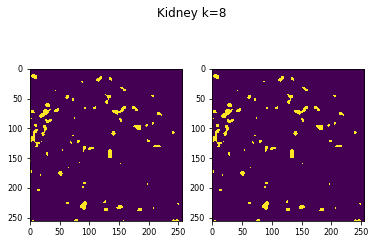

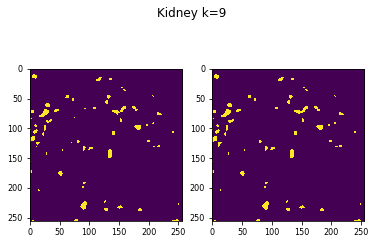

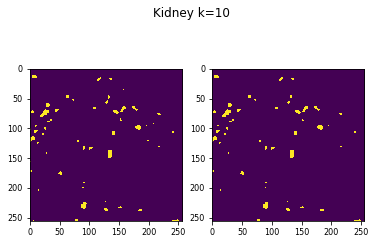

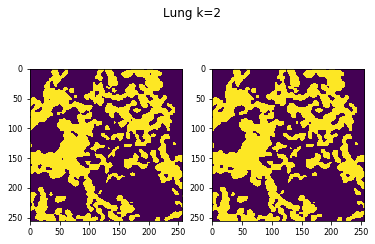

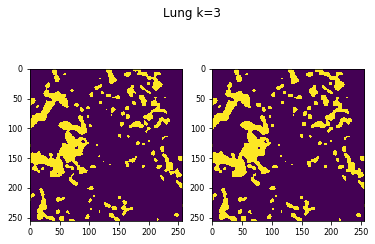

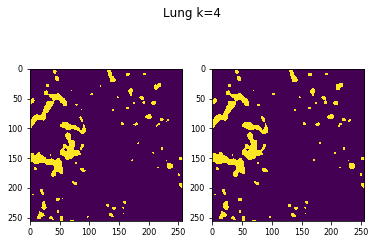

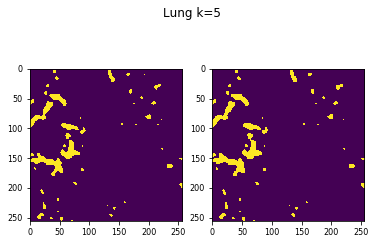

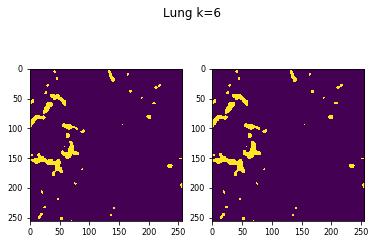

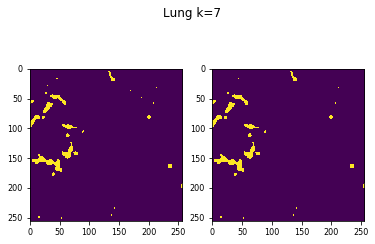

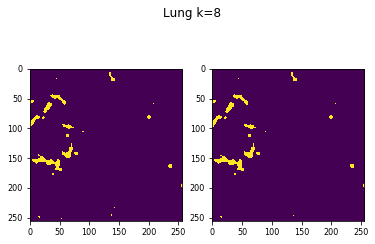

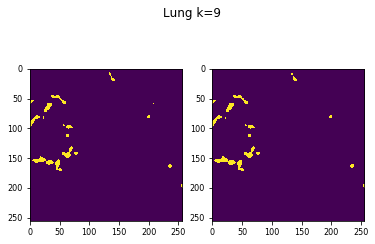

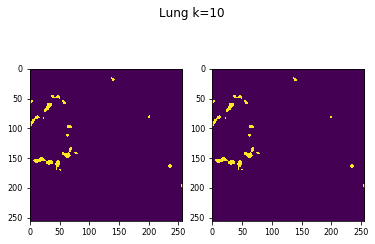

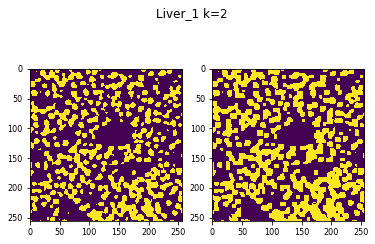

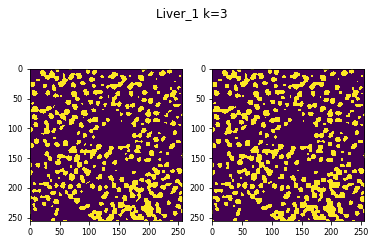

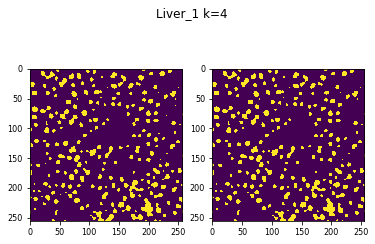

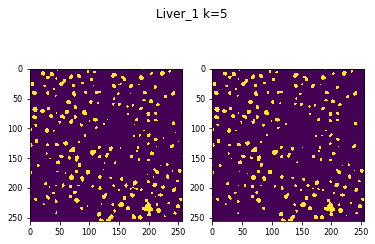

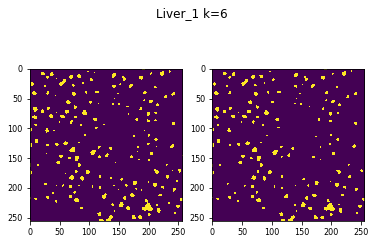

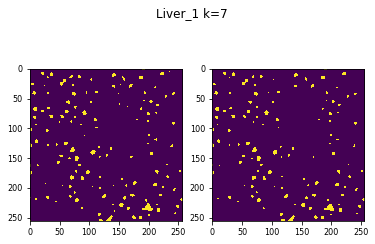

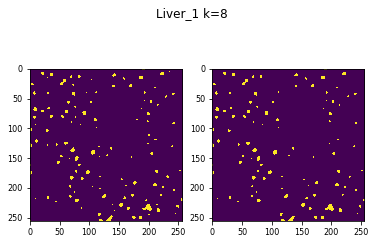

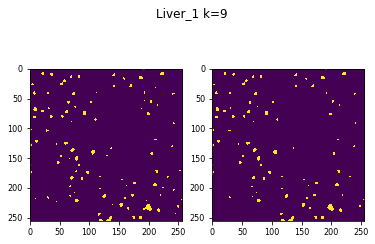

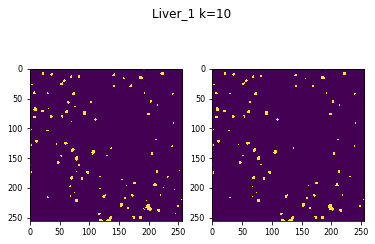

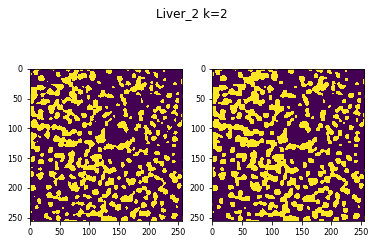

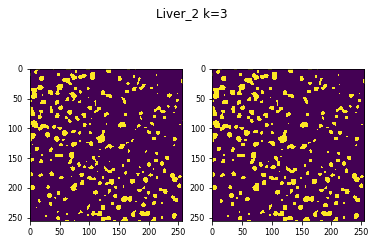

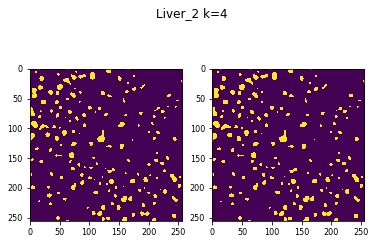

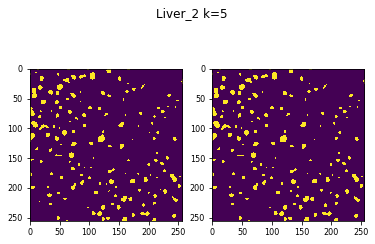

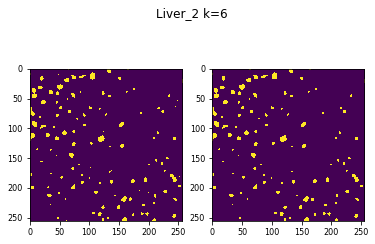

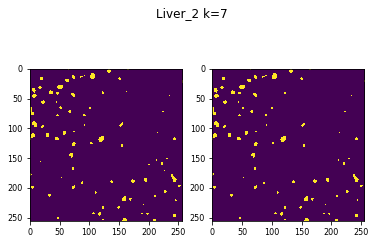

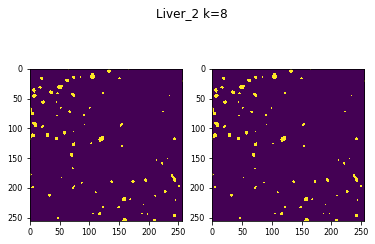

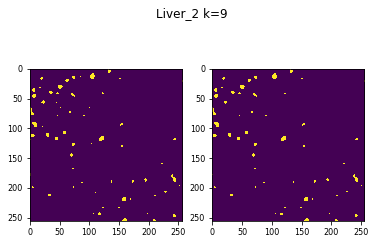

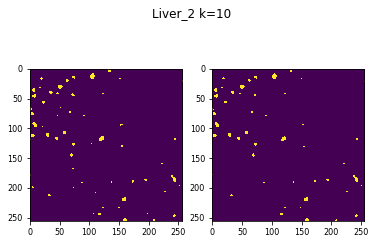

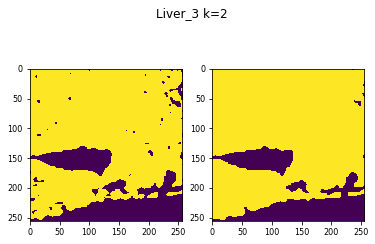

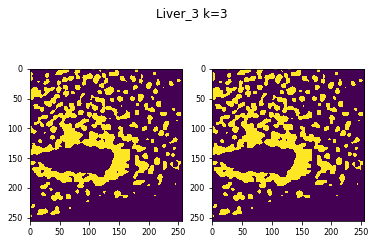

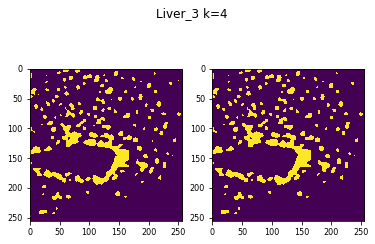

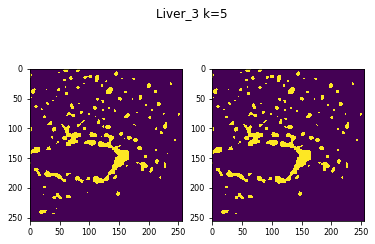

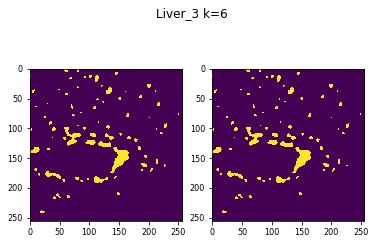

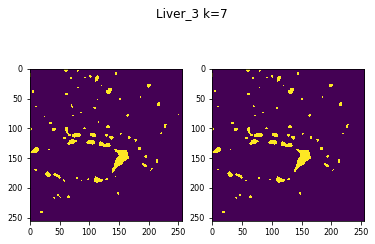

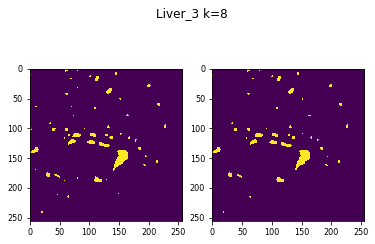

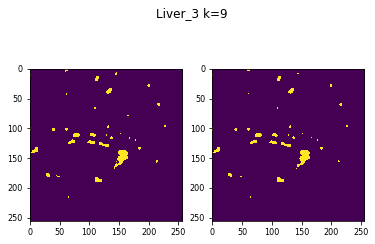

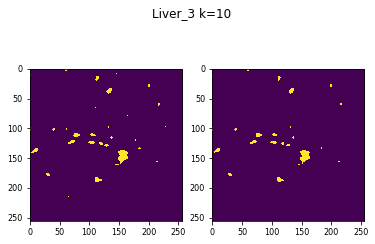

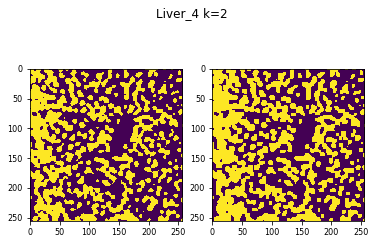

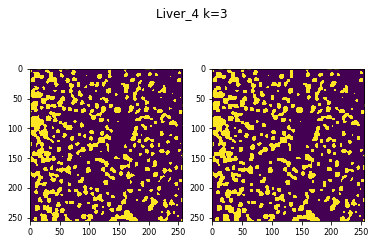

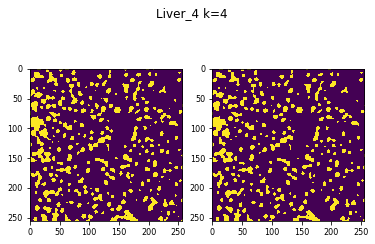

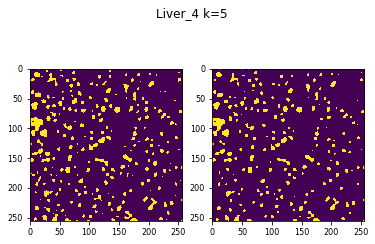

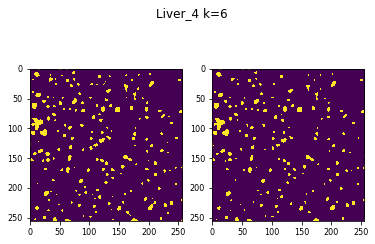

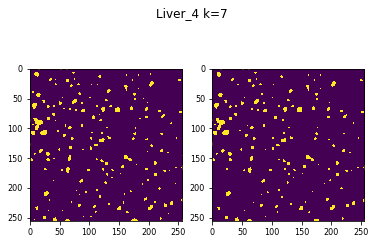

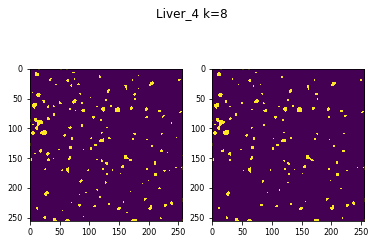

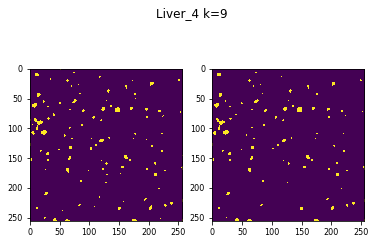

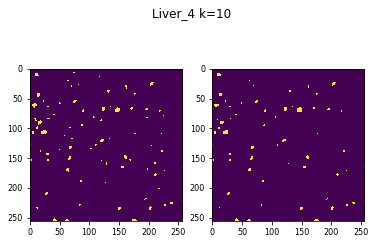

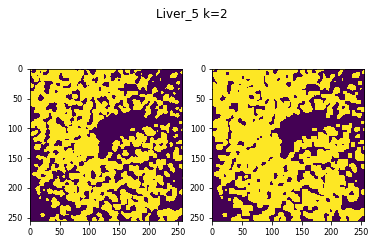

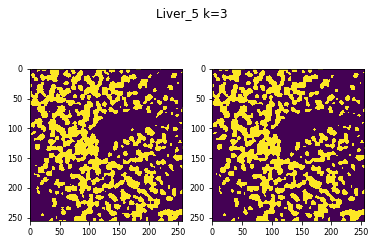

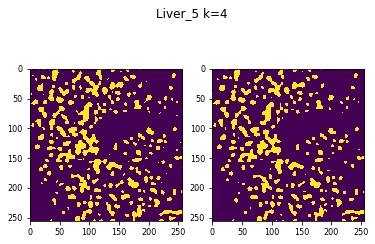

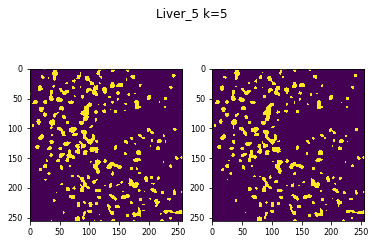

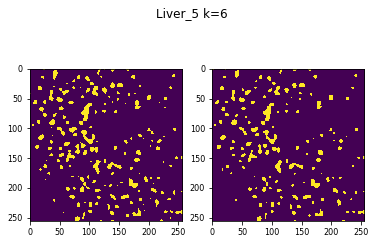

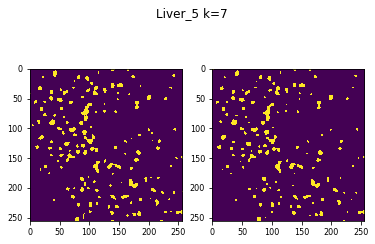

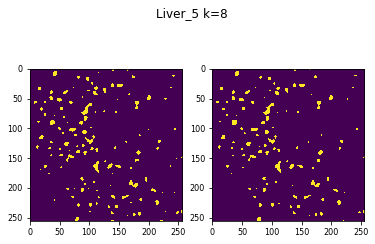

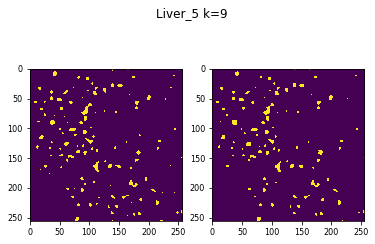

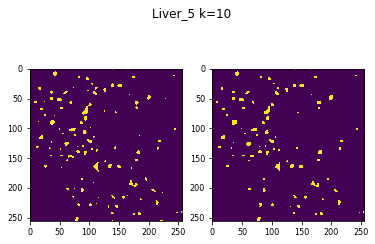

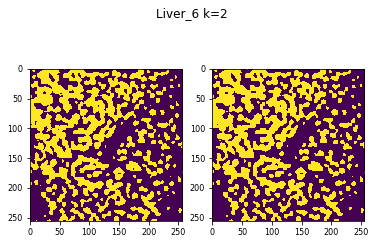

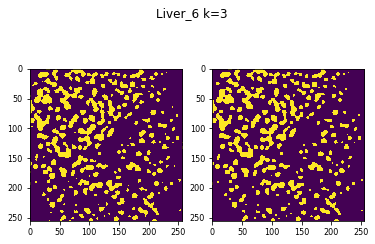

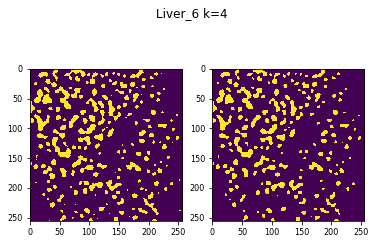

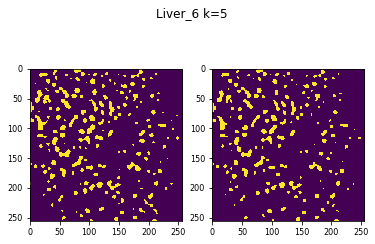

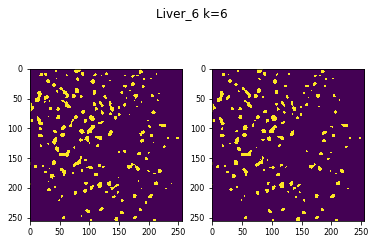

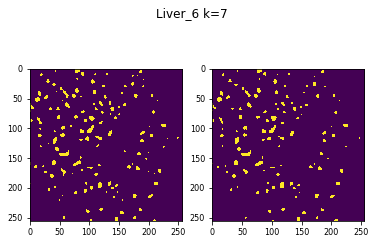

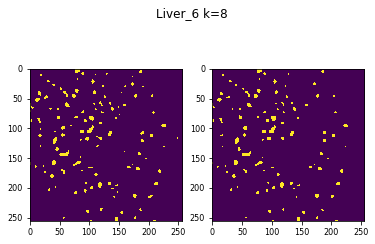

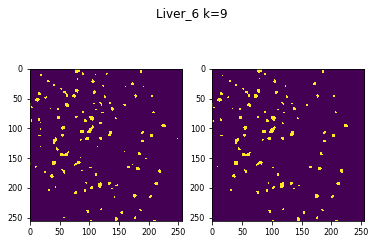

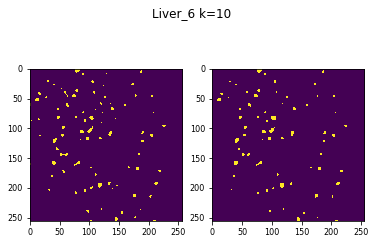

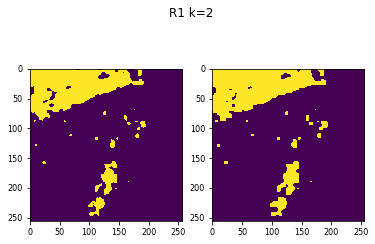

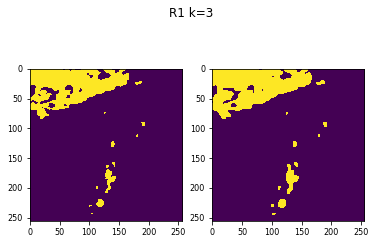

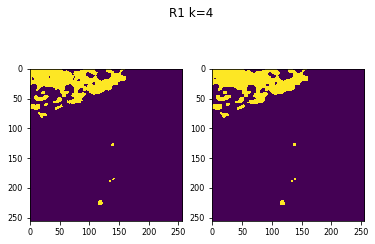

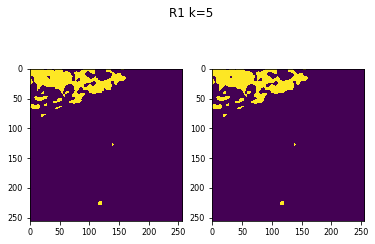

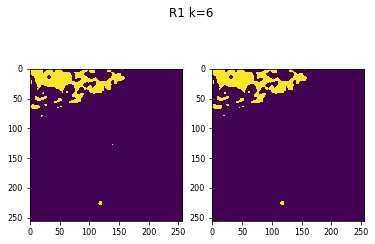

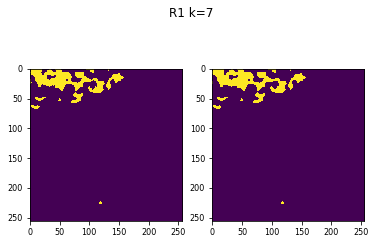

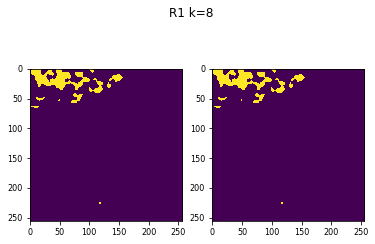

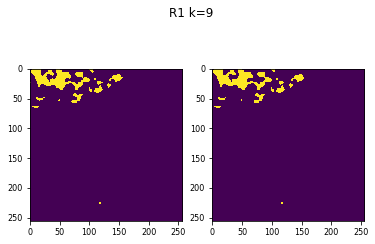

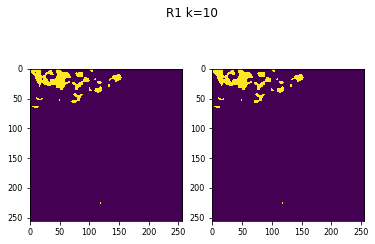

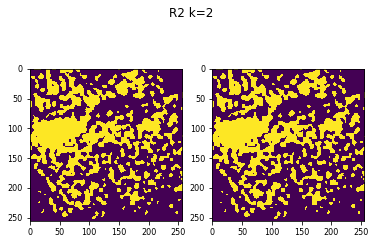

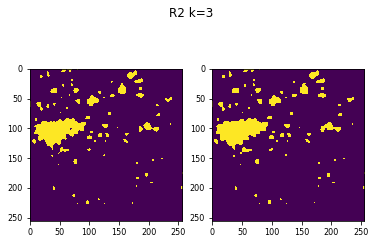

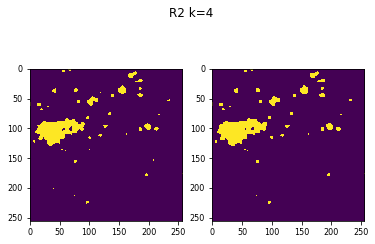

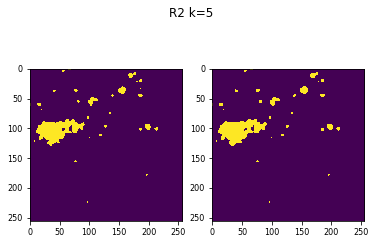

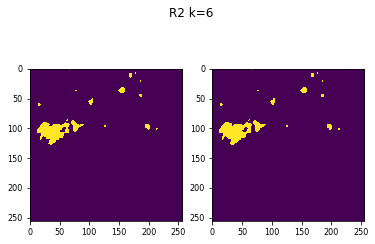

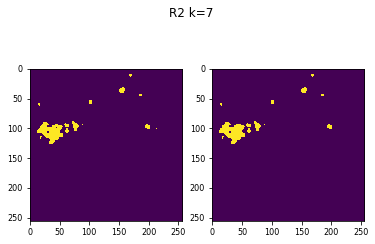

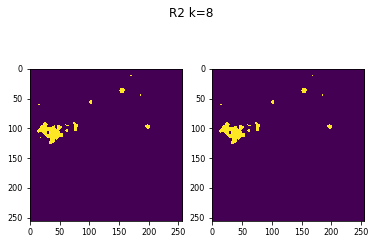

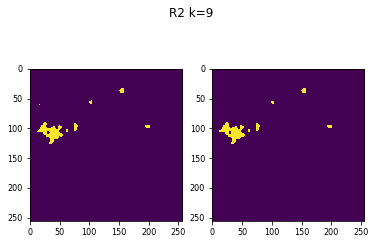

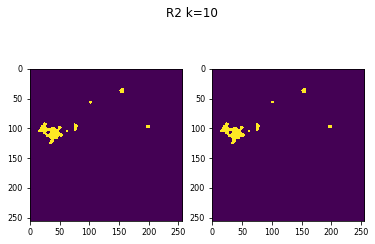

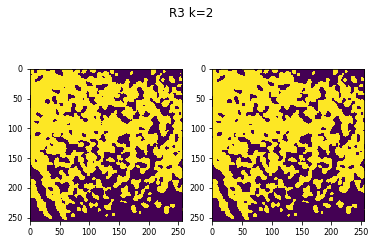

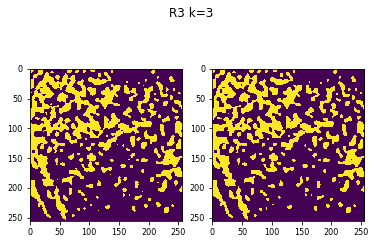

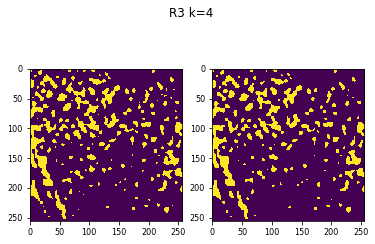

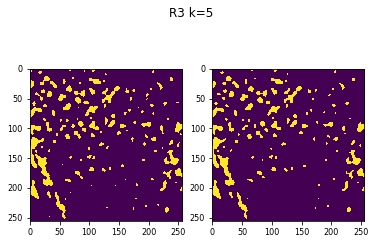

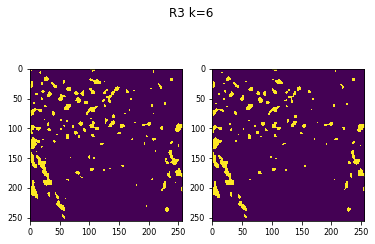

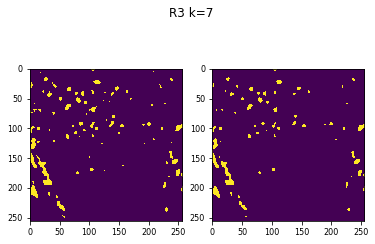

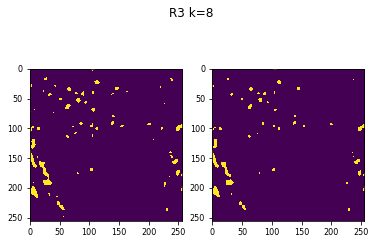

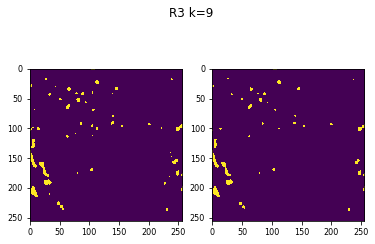

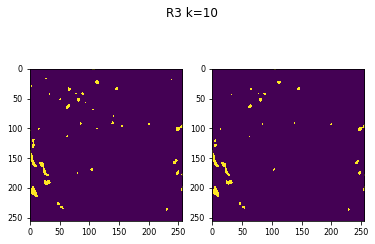

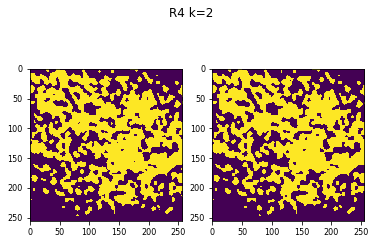

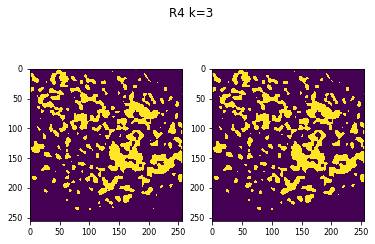

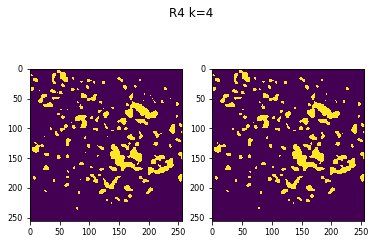

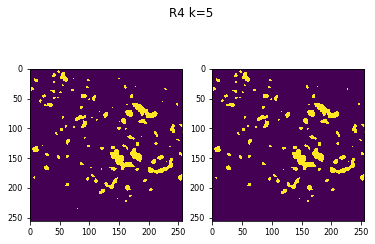

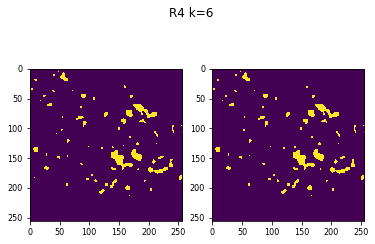

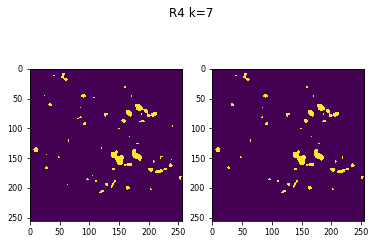

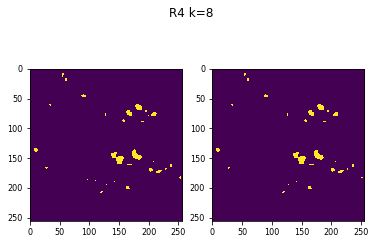

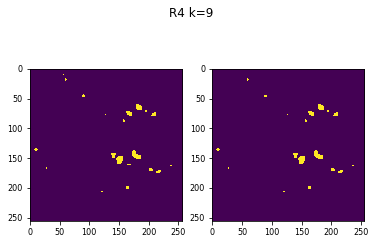

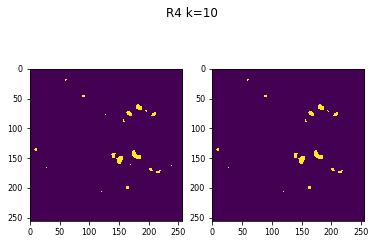

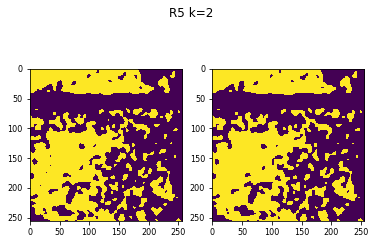

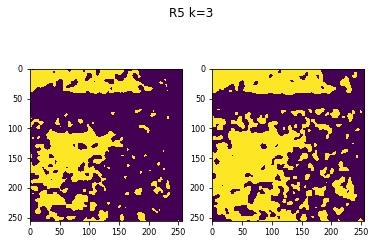

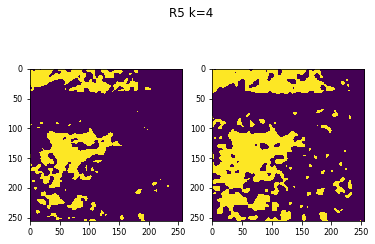

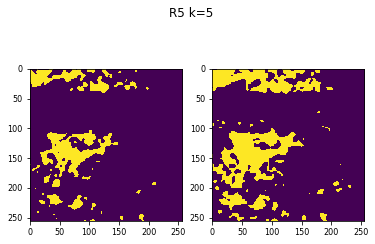

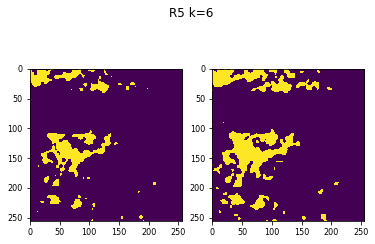

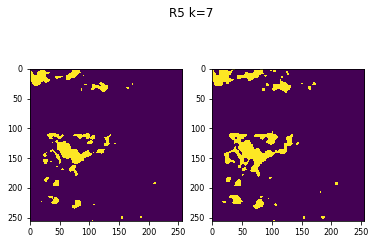

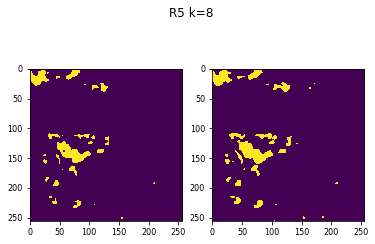

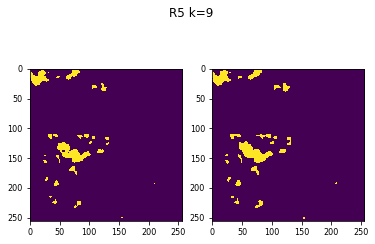

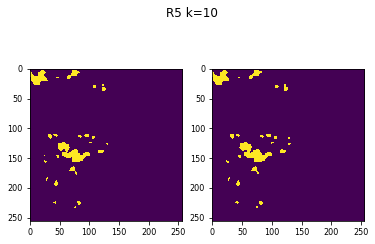

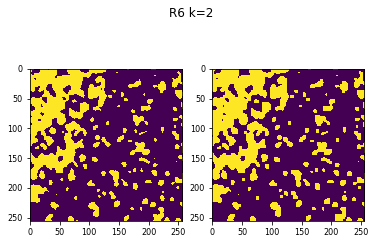

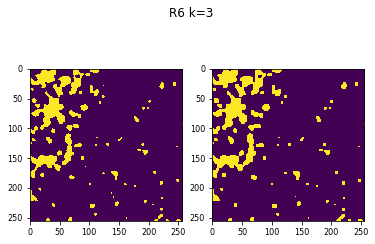

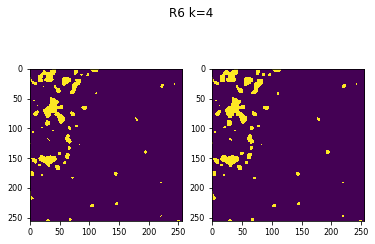

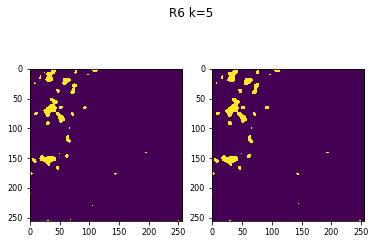

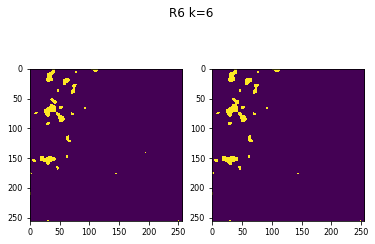

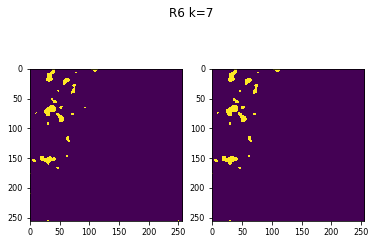

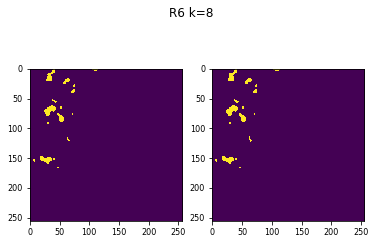

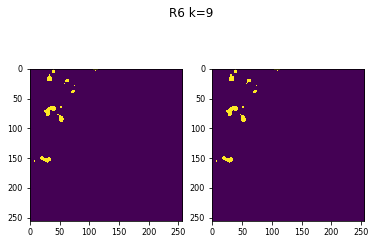

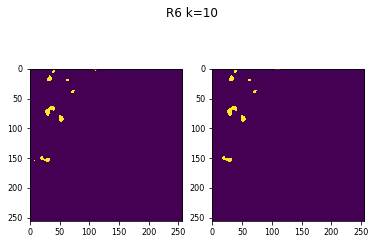

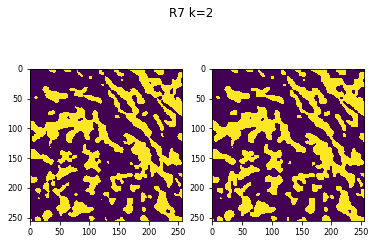

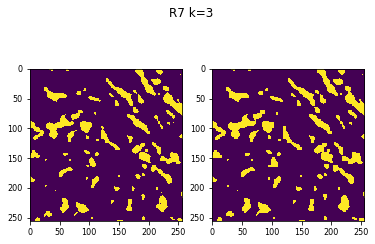

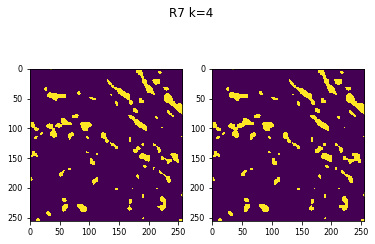

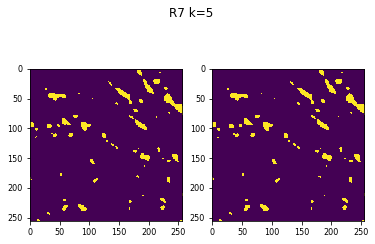

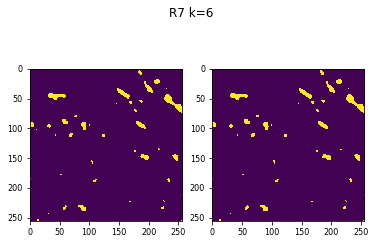

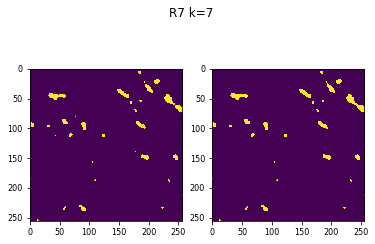

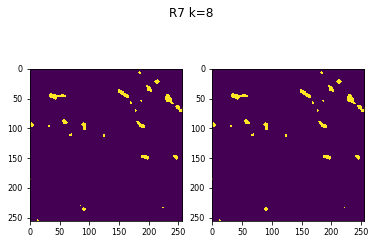

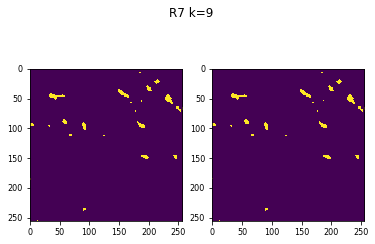

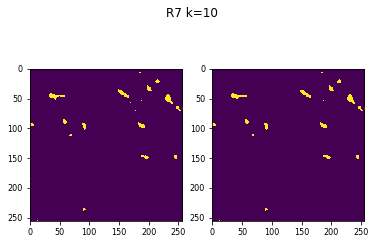

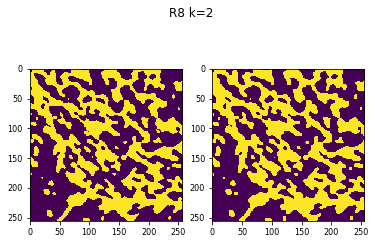

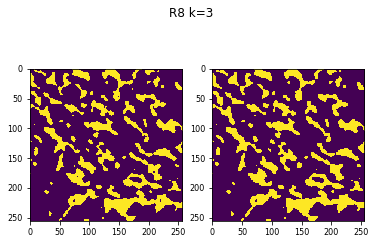

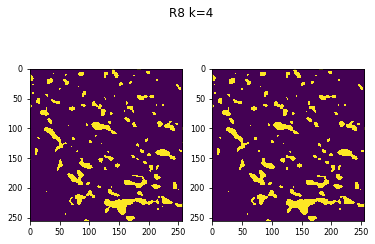

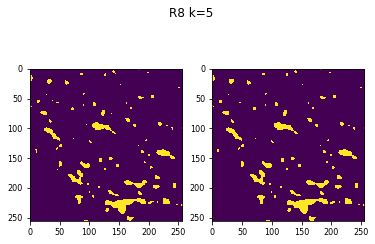

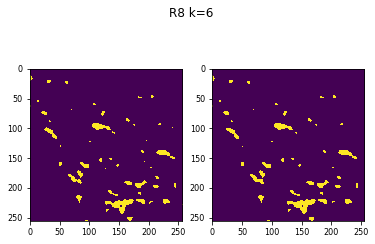

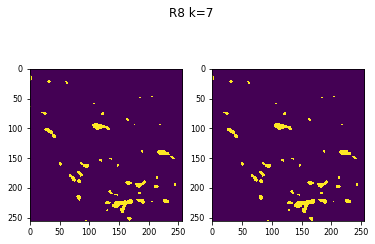

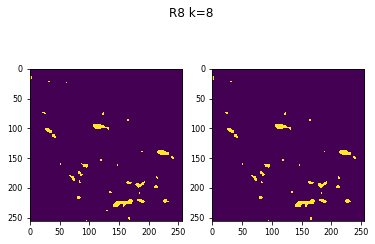

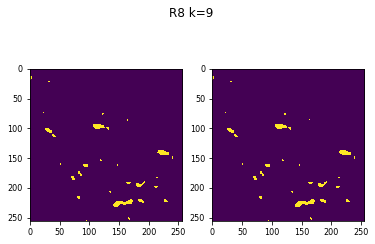

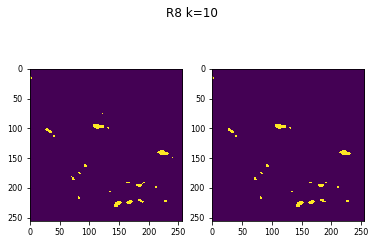

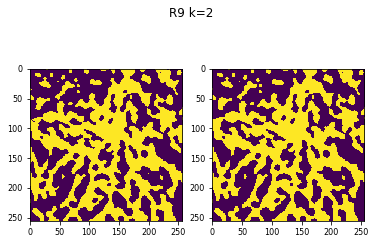

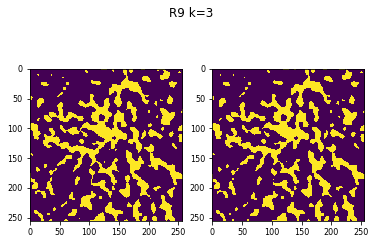

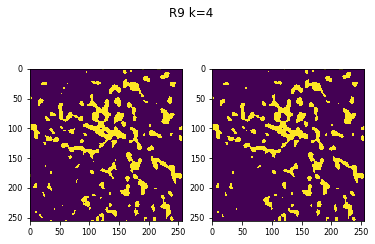

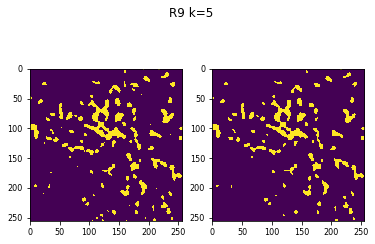

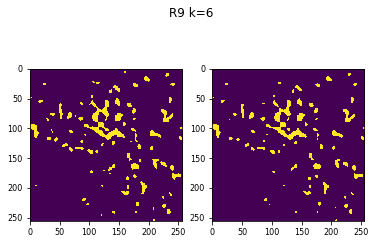

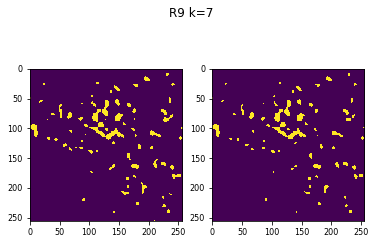

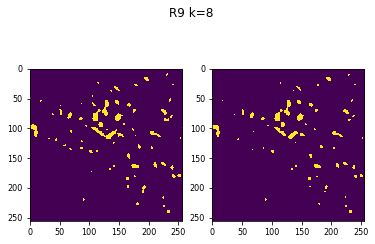

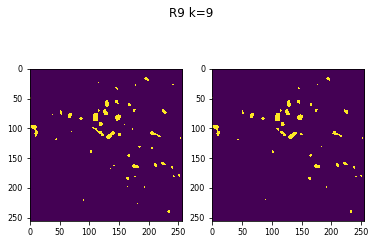

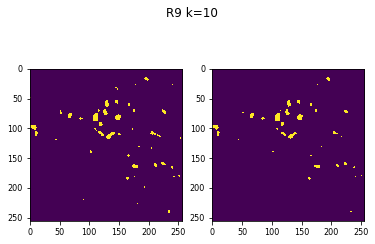

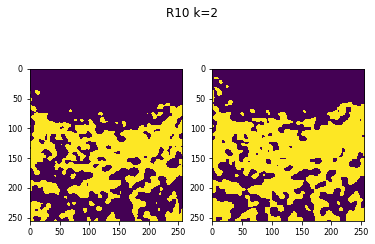

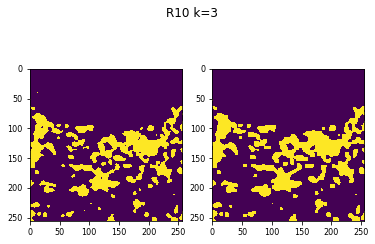

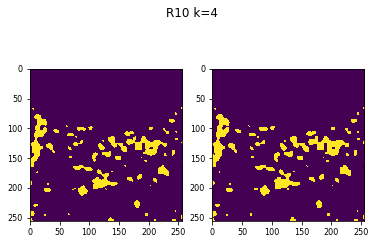

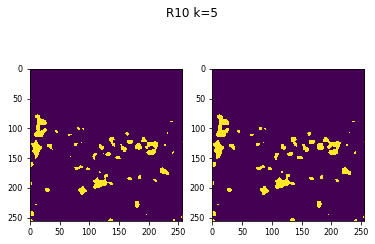

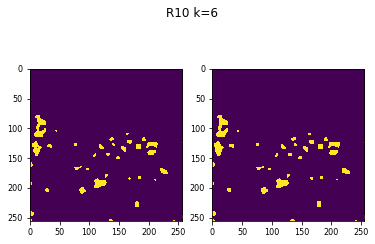

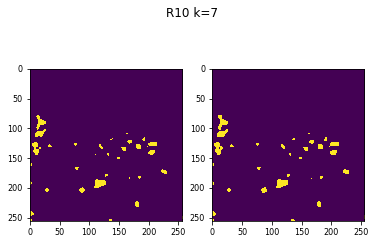

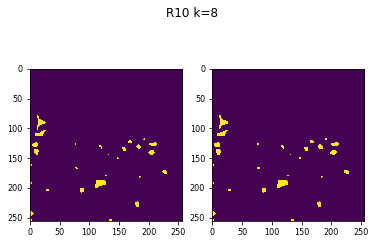

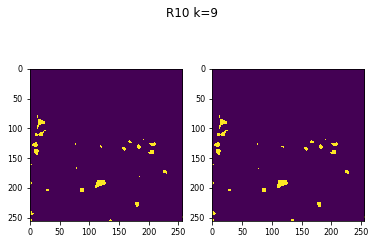

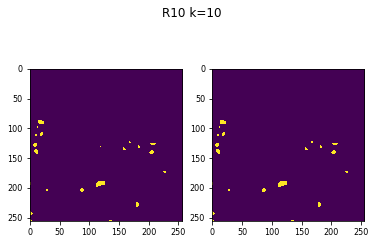

In [72]:
tissue_list = [
    'A549','Hela','SK','10A','MCF7',
    'Intestine','Kidney','Lung',
    'Liver_1','Liver_2','Liver_3','Liver_4','Liver_5','Liver_6',
    'R1','R2','R3','R4','R5','R6','R7','R8','R9','R10'
]
k_range = [2,3,4,5,6,7,8,9,10]
for test_tissue in tissue_list:
    HMRF_mask_dict[test_tissue] = {}
    for k in k_range:
        img = SIMS_dict[test_tissue]
        final_seg,initial_seg = HMRF(img,k)
        HMRF_mask_dict[test_tissue][k]=final_seg
        fig,axes = plt.subplots(1,2)
        axes[0].imshow(initial_seg)
        axes[1].imshow(final_seg)
        fig.suptitle('{0} k={1}'.format(test_tissue,str(k)))
        plt.show()

In [73]:
with open('/home/yzy/bioSIMS/data/Segment_HMRF/HMRF_mask.pickle', 'wb') as handle:
    pickle.dump(HMRF_mask_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

In [76]:
len(HMRF_mask_dict['R10'])

9